In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from textblob import TextBlob

In [ ]:
import os
!pip install twint



!pip uninstall twint -y
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint/
!pip3 install . -r requirements.txt
%cd ..


     |████████████████████████████████| 1.3 MB 39.4 MB/s 
     |████████████████████████████████| 263 kB 43.2 MB/s 
     |████████████████████████████████| 378 kB 62.5 MB/s 
     |████████████████████████████████| 291 kB 58.7 MB/s 
     |████████████████████████████████| 160 kB 61.6 MB/s 
     |████████████████████████████████| 271 kB 64.4 MB/s 
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33930 sha256=ead626aef0bef346be8e93dd0efc9435382e716b87cb0390181c5a5d59848e89
  Stored in directory: /root/.cache/pip/wheels/44/fc/77/99887a36b5c265a87516158858697d1a0b8f32c4d4dbddbb24
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=c0079e6daef8abdcd56e01686b0326433ba7351243b5249db9c91fb34acbfe4a
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for googletransx: filename=googletransx-2.4.2-py3-none-any.whl size=15968 sha256=838c2aa211ee232ad00978cb2

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import twint

# Configure
c = 0
os.remove("out.csv")
c = twint.Config()
c.Search = "I dont feel well"
c.Limit= 50
c.Store_csv = True
c.Output = "out.csv"
c.Since = "2021-10-10"


# Run
twint.run.Search(c)

1451747803701686272 2021-10-23 03:10:23 +0000 <GLADION_IRL> im going to bed because i dont feel well
1451746963179794435 2021-10-23 03:07:02 +0000 <xuxicaffe> hello i'll be ia for today but i'll still spare time to open twt, i dont feel well and my temperature is not normal yet, so tca everyone !
1451744217156493312 2021-10-23 02:56:08 +0000 <Dinorageux> @youngk_noodle I m anxious i m not gonna lie and at the same time happy for him? I dont know it s weird and yeah i just donr know what to espect i try to stay positive and yeah maybe ... maybe something great and unexpected gonna happen but yeah i dont feel well
1451743391264477189 2021-10-23 02:52:51 +0000 <Dinorageux> I just watched Jae's live he seems so happy so i m very happy for him and excited for what's coming. But i m kinda worried at the same time because i dont know what to expect for Day6 you know... i dont know i m just overthinking maybe i dont feel well it s 5 am i cant think well
1451708628537249802 2021-10-23 00:34:43 

In [ ]:
import pandas as pd
import numpy as np

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

Import Dataset

In [ ]:
tweets_df = pd.read_csv('out.csv')

In [ ]:
tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1451747803701686272,1451747803701686272,2021-10-23 03:10:23 UTC,2021-10-23,03:10:23,0,1377313395263868931,gladion_irl,## GLADION/PENNY,NaN,im going to bed because i dont feel well,en,[],[],[],1,0,1,[],[],https://twitter.com/GLADION_IRL/status/1451747...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1451746963179794435,1451746963179794435,2021-10-23 03:07:02 UTC,2021-10-23,03:07:02,0,1297598332131577863,xuxicaffe,ً xav,NaN,hello i'll be ia for today but i'll still spar...,en,[],[],[],12,1,15,[],[],https://twitter.com/xuxicaffe/status/145174696...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1451744217156493312,1451743391264477189,2021-10-23 02:56:08 UTC,2021-10-23,02:56:08,0,784024196036882432,dinorageux,◇Flu.◇ ★Eternal✨Yonk's Military wife,NaN,@youngk_noodle I m anxious i m not gonna lie a...,en,[],[],[],1,0,1,[],[],https://twitter.com/Dinorageux/status/14517442...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'youngk_noodle', 'name': '𝐒𝐨𝐠...",NaN,NaN,NaN,NaN
3,1451743391264477189,1451743391264477189,2021-10-23 02:52:51 UTC,2021-10-23,02:52:51,0,784024196036882432,dinorageux,◇Flu.◇ ★Eternal✨Yonk's Military wife,NaN,I just watched Jae's live he seems so happy so...,en,[],[],[],1,1,4,[],[],https://twitter.com/Dinorageux/status/14517433...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1451708628537249802,1451708628537249802,2021-10-23 00:34:43 UTC,2021-10-23,00:34:43,0,170530544,daniel104579,đaniel,NaN,I'm seriously such a baby when I dont feel well ☠,en,[],[],[],0,0,1,[],[],https://twitter.com/daniel104579/status/145170...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Trim unnecessary columns

In [ ]:
tweets_df.drop(['date', 'time', 'timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest'], axis = 1, inplace = True)
tweets_df.head()

,id,conversation_id,created_at,user_id,username,tweet,language
0,1451747803701686272,1451747803701686272,2021-10-23 03:10:23 UTC,1377313395263868931,gladion_irl,im going to bed because i dont feel well,en
1,1451746963179794435,1451746963179794435,2021-10-23 03:07:02 UTC,1297598332131577863,xuxicaffe,hello i'll be ia for today but i'll still spar...,en
2,1451744217156493312,1451743391264477189,2021-10-23 02:56:08 UTC,784024196036882432,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,en
3,1451743391264477189,1451743391264477189,2021-10-23 02:52:51 UTC,784024196036882432,dinorageux,I just watched Jae's live he seems so happy so...,en
4,1451708628537249802,1451708628537249802,2021-10-23 00:34:43 UTC,170530544,daniel104579,I'm seriously such a baby when I dont feel well ☠,en


In [ ]:
tweets_df.drop(['conversation_id','user_id'], axis = 1, inplace = True)
tweets_df.head()

,id,created_at,username,tweet,language
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,en
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,en
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,en
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,en
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,en


In [ ]:
tweets_df['tweet'].head(4)

0             im going to bed because i dont feel well
1    hello i'll be ia for today but i'll still spar...
2    @youngk_noodle I m anxious i m not gonna lie a...
3    I just watched Jae's live he seems so happy so...
Name: tweet, dtype: object

Drop non english tweets

In [ ]:
tweets_df = tweets_df[tweets_df.language == 'en']
tweets_df.head()

,id,created_at,username,tweet,language
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,en
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,en
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,en
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,en
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,en


In [ ]:
tweets_df.drop_duplicates()
df = tweets_df

In [ ]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.isnull().any().any()  

False

Remove stopwords

In [ ]:
df['clean_tweet'] = df['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 

In [ ]:
df.head()

,id,created_at,username,tweet,language,clean_tweet
1,1451750648014327814,2021-10-23 03:21:41 UTC,fuego_black,@TheBlackHokage Ignore the fact that I butcher...,en,@TheBlackHokage Ignore fact I butchered tweet....
5,1451750647859224577,2021-10-23 03:21:41 UTC,ramoncastillo2,Ok I’ll buy this shirt. 💵💵,en,Ok I’ll buy shirt. 💵💵
6,1451750647821488132,2021-10-23 03:21:41 UTC,poduckk,@QU1RKYTWTS i hope both sides of their pillow ...,en,@QU1RKYTWTS hope sides pillow warm fiery depth...
7,1451750647787925505,2021-10-23 03:21:41 UTC,artemissongs,My hairs ability to retain moisture 15 hours a...,en,My hairs ability retain moisture 15 hours show...
8,1451750647787831302,2021-10-23 03:21:41 UTC,tweetsdmm,Is Ted Lasso worth watching? Just finished Squ...,en,Is Ted Lasso worth watching? Just finished Squ...


Expand Contractions

In [ ]:
!pip install contractions
import contractions

In [ ]:
df['clean_tweet_exp'] = df['clean_tweet'].apply(lambda x: contractions.fix(x)) 

In [ ]:
df.head()

,id,created_at,username,tweet,language,clean_tweet,clean_tweet_exp
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,en,im going bed dont feel well,I am going bed do not feel well
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,en,hello i'll ia today i'll still spare time open...,hello I will ia today I will still spare time ...
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,en,@youngk_noodle I anxious gonna lie time happy ...,@youngk_noodle I anxious going to lie time hap...
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,en,I watched Jae's live seems happy happy excited...,I watched Jae's live seems happy happy excited...
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,en,I'm seriously baby I dont feel well ☠,I am seriously baby I do not feel well ☠


Emoji removal

In [ ]:
!pip install demoji
import demoji
demoji.download_codes()

In [ ]:
def emoji_remover(text):
  return demoji.replace_with_desc(text, "")


Remove URLs, Emails, Usernames and special characters

In [ ]:
def url_remover(val):
  return " ".join(re.sub("(\w+:\/\/\S+)", "", val).split())

In [ ]:
def email_remover(val):
  return " ".join(re.sub("(\w+@\w+\.\w+)", "", val).split())

In [ ]:
def username_remover(val):
  return " ".join(re.sub("(@\w\S+)", "", val).split())

In [ ]:
def special_char_remover(val):
  return " ".join(re.sub("([^0-9A-Za-z \t])", "", val).split())

In [ ]:
stop_words = set(stopwords)
def stopword_remover(val):
  tok = val.split(' ')
  res = ""
  for i in tok:
    if i in stop_words:
      continue
    else:
      res = res+i+" "
  return res

In [ ]:
def slang_correction(tweet):
  file=open("/content/gdrive/MyDrive/Capstone/Notebooks/slangdict.txt","r")
  slang=file.read()
  slang=slang.split('\n')
  tweet_tokens=tweet.split()
  slang_word=[]
  meaning=[]
  for line in slang:
    temp=line.split(",")
    slang_word.append(temp[0])
    meaning.append(temp[-1])
  for i,word in enumerate(tweet_tokens):
    if word in slang_word:
        idx=slang_word.index(word)
        tweet_tokens[i]=meaning[idx]
  tweet=" ".join(tweet_tokens)
  return tweet
 

In [ ]:
  def spelling_correction(text):
    b=TextBlob(text)
    a=str(b.correct())
    return a

    

In [ ]:
def clean_text(text):
  text = emoji_remover(text)
  text = url_remover(text)
  text = email_remover(text)
  text = username_remover(text)
  text = special_char_remover(text)
  text = stopword_remover(text)
  text= slang_correction(text)
  text = spelling_correction(text)


  return text

In [ ]:
# Remove stopwords
stop_words = set(stopwords)
df['clean_tweet_exp2'] = df['clean_tweet_exp'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words])) 

In [ ]:
df['cleanest_tweet'] = df['clean_tweet_exp2'].apply(lambda x: clean_text(x))

In [ ]:
df.head()

,id,created_at,username,tweet,language,clean_tweet,clean_tweet_exp,clean_tweet_exp2,cleanest_tweet
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,en,im going bed dont feel well,I am going bed do not feel well,I going bed feel well,I going bed feel well
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,en,hello i'll ia today i'll still spare time open...,hello I will ia today I will still spare time ...,"hello I ia today I still spare time open twt, ...",hello I in today I still spare time open two f...
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,en,@youngk_noodle I anxious gonna lie time happy ...,@youngk_noodle I anxious going to lie time hap...,@youngk_noodle I anxious going lie time happy ...,I anxious going lie time happy I know weird ye...
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,en,I watched Jae's live seems happy happy excited...,I watched Jae's live seems happy happy excited...,I watched Jae's live seems happy happy excited...,I watched Was live seems happy happy excited c...
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,en,I'm seriously baby I dont feel well ☠,I am seriously baby I do not feel well ☠,I seriously baby I feel well ☠,I seriously baby I feel well skull crossbones


Position and Lemmatization

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
df['lem_tweet'] = df['cleanest_tweet'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
df['lem_tweet'] = df['lem_tweet'].apply(lambda x: x.lower())

In [ ]:
df.head()

,id,created_at,username,tweet,language,clean_tweet,clean_tweet_exp,clean_tweet_exp2,cleanest_tweet,lem_tweet
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,en,im going bed dont feel well,I am going bed do not feel well,I going bed feel well,I going bed feel well,i go bed feel well
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,en,hello i'll ia today i'll still spare time open...,hello I will ia today I will still spare time ...,"hello I ia today I still spare time open twt, ...",hello I in today I still spare time open two f...,hello i in today i still spare time open two f...
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,en,@youngk_noodle I anxious gonna lie time happy ...,@youngk_noodle I anxious going to lie time hap...,@youngk_noodle I anxious going lie time happy ...,I anxious going lie time happy I know weird ye...,i anxious go lie time happy i know weird yeah ...
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,en,I watched Jae's live seems happy happy excited...,I watched Jae's live seems happy happy excited...,I watched Jae's live seems happy happy excited...,I watched Was live seems happy happy excited c...,i watch was live seem happy happy excite come ...
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,en,I'm seriously baby I dont feel well ☠,I am seriously baby I do not feel well ☠,I seriously baby I feel well ☠,I seriously baby I feel well skull crossbones,i seriously baby i feel well skull crossbones


Get Vader Score for each tweet, check polarity //and assign label based on that (no label right?)

---



---



In [ ]:
  df['vader_score'] = df['lem_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
df['vader_sentiment_label']= df['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

In [ ]:
df[['id','created_at','username','tweet','lem_tweet','vader_score','language']].head()

,id,created_at,username,tweet,lem_tweet,vader_score,language
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,i go bed feel well,0.2732,en
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,hello i in today i still spare time open two f...,0.2732,en
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,i anxious go lie time happy i know weird yeah ...,0.9612,en
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,i watch was live seem happy happy excite come ...,0.8393,en
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,i seriously baby i feel well skull crossbones,0.1027,en


In [ ]:
df.head()

,id,created_at,username,tweet,language,clean_tweet,clean_tweet_exp,clean_tweet_exp2,cleanest_tweet,lem_tweet,vader_score,vader_sentiment_label
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,en,im going bed dont feel well,I am going bed do not feel well,I going bed feel well,I going bed feel well,i go bed feel well,0.2732,1
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,en,hello i'll ia today i'll still spare time open...,hello I will ia today I will still spare time ...,"hello I ia today I still spare time open twt, ...",hello I in today I still spare time open two f...,hello i in today i still spare time open two f...,0.2732,1
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,en,@youngk_noodle I anxious gonna lie time happy ...,@youngk_noodle I anxious going to lie time hap...,@youngk_noodle I anxious going lie time happy ...,I anxious going lie time happy I know weird ye...,i anxious go lie time happy i know weird yeah ...,0.9612,1
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,en,I watched Jae's live seems happy happy excited...,I watched Jae's live seems happy happy excited...,I watched Jae's live seems happy happy excited...,I watched Was live seems happy happy excited c...,i watch was live seem happy happy excite come ...,0.8393,1
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,en,I'm seriously baby I dont feel well ☠,I am seriously baby I do not feel well ☠,I seriously baby I feel well ☠,I seriously baby I feel well skull crossbones,i seriously baby i feel well skull crossbones,0.1027,1


In [ ]:
positive_count = len(df[df['vader_score'] >=0.05])
neutral_count = len(df[(df['vader_score'] >-0.05) & (df['vader_score']<0.05)])
negative_count = len(df[df['vader_score']<0.05])
print(positive_count, neutral_count, negative_count)

47 3 11


In [ ]:
df.drop(['language','clean_tweet', 'clean_tweet_exp', 'clean_tweet_exp2', 'cleanest_tweet', ], axis = 1, inplace = True)
df.head()

,id,created_at,username,tweet,lem_tweet,vader_score,vader_sentiment_label
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,i go bed feel well,0.2732,1
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,hello i in today i still spare time open two f...,0.2732,1
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,i anxious go lie time happy i know weird yeah ...,0.9612,1
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,i watch was live seem happy happy excite come ...,0.8393,1
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,i seriously baby i feel well skull crossbones,0.1027,1


In [ ]:
df.to_csv('vader_tweets.csv')

In [ ]:
df.drop(['vader_score', 'vader_sentiment_label'], axis = 1, inplace = True)
df.head()

,id,created_at,username,tweet,lem_tweet
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,i go bed feel well
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,hello i in today i still spare time open two f...
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,i anxious go lie time happy i know weird yeah ...
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,i watch was live seem happy happy excite come ...
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,i seriously baby i feel well skull crossbones


In [ ]:
df['final_tweet'] = df['lem_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df.head()

,id,created_at,username,tweet,lem_tweet,final_tweet
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,i go bed feel well,go bed feel well
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,hello i in today i still spare time open two f...,hello today still spare time open two feel wel...
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,i anxious go lie time happy i know weird yeah ...,anxious go lie time happy know weird yeah know...
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,i watch was live seem happy happy excite come ...,watch live seem happy happy excite come kind w...
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,i seriously baby i feel well skull crossbones,seriously baby feel well skull crossbones


In [ ]:
df.drop(['lem_tweet'], axis = 1, inplace = True)
df.head()

,id,created_at,username,tweet,final_tweet
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,go bed feel well
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,hello today still spare time open two feel wel...
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,anxious go lie time happy know weird yeah know...
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,watch live seem happy happy excite come kind w...
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,seriously baby feel well skull crossbones


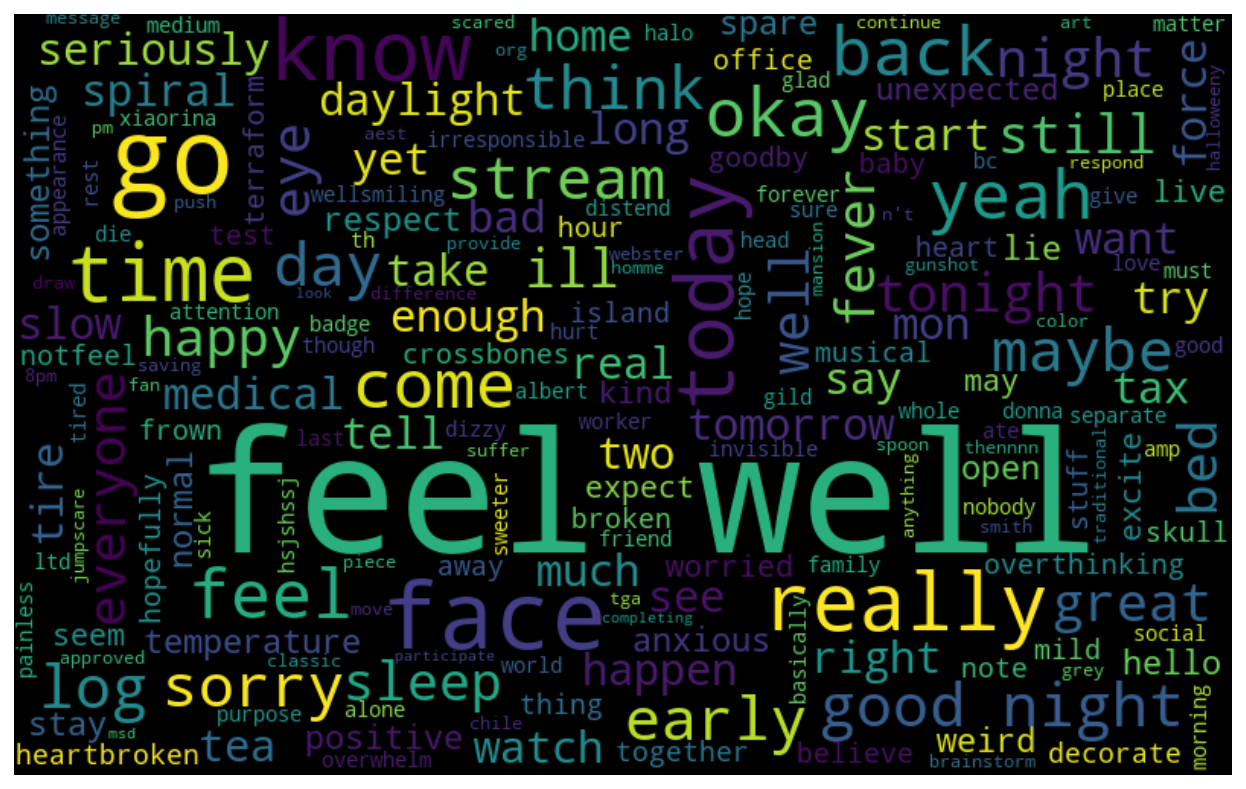

In [ ]:
# Depression Tweets
tweets_arr = df['final_tweet']
all_words = ' '.join([text for text in tweets_arr])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('phase1_tweets.csv')

In [ ]:
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re

from math import exp
from numpy import sign

from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from nltk import PorterStemmer

from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/Capstone/model/model_fuller')

In [ ]:
MAX_SEQUENCE_LENGTH = 54 # Max tweet size
MAX_NB_WORDS = 10000
EMBEDDING_DIM = 300

In [ ]:
word2vec = KeyedVectors.load_word2vec_format('/content/gdrive/MyDrive/Capstone/dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
a=df['final_tweet'].astype('string')
type(a)

pandas.core.series.Series

In [ ]:
# data=pd.read_csv('phase1_tweets.csv')
# data.head()
a=df['final_tweet']
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(a)
sequences_d = tokenizer.texts_to_sequences(a)
word_index = tokenizer.word_index
data_d = pad_sequences(sequences_d, maxlen=MAX_SEQUENCE_LENGTH)
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
# print(nb_words)
# print(word_index)
# print(MAX_NB_WORDS)
for (word, idx) in word_index.items():
  if word in word2vec.vocab and idx < MAX_NB_WORDS:
    embedding_matrix[idx-1] = word2vec.word_vec(word)
test = data_d
labels_pred=model.predict(test)
c=-1
username=[]
for i in labels_pred:
  c=c+1
  if(i>0.5):
    username.append(df['username'].iloc[c])
    print('dep -->', df['tweet'].iloc[c])
  else:
    print('no --->', df['tweet'].iloc[c])


dep --> im going to bed because i dont feel well
no ---> hello i'll be ia for today but i'll still spare time to open twt, i dont feel well and my temperature is not normal yet, so tca everyone !
no ---> @youngk_noodle I m anxious i m not gonna lie and at the same time happy for him? I dont know it s weird and yeah i just donr know what to espect i try to stay positive and yeah maybe ... maybe something great and unexpected gonna happen but yeah i dont feel well
dep --> I just watched Jae's live he seems so happy so i m very happy for him and excited for what's coming. But i m kinda worried at the same time because i dont know what to expect for Day6 you know... i dont know i m just overthinking maybe i dont feel well it s 5 am i cant think well
no ---> I'm seriously such a baby when I dont feel well ☠
dep --> @fuckyoumilo_ okay-
dep --> I dont feel well. 😵‍💫
no ---> @fuckyoumilo_ what did milo do
no ---> gonna restart my island off stream as i dont feel well enough to stream :c but il

In [ ]:
len(labels_pred)

58

In [ ]:
# data=pd.read_csv('phase1_tweets.csv')
# data.head()
a=df['final_tweet'].astype('string')
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(a)
sequences_d = tokenizer.texts_to_sequences(a)
word_index = tokenizer.word_index
data_d = pad_sequences(sequences_d, maxlen=MAX_SEQUENCE_LENGTH)
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
# print(nb_words)
# print(word_index)
# print(MAX_NB_WORDS)
for (word, idx) in word_index.items():
  if word in word2vec.vocab and idx < MAX_NB_WORDS:
    embedding_matrix[idx-1] = word2vec.word_vec(word)
test = data_d
labels_pred=model.predict(test)
print(labels_pred)


[[9.9423081e-01]
 [6.9503207e-05]
 [2.0242721e-02]
 [9.9693012e-01]
 [8.1978011e-05]
 [9.9684083e-01]
 [9.9421406e-01]
 [2.6767254e-03]
 [2.6133694e-05]
 [4.6594143e-03]
 [5.8640540e-02]
 [2.0214915e-04]
 [9.8171830e-04]
 [2.2993856e-05]
 [4.1508516e-05]
 [9.9704415e-02]
 [9.9395049e-01]
 [9.9764252e-01]
 [9.0461969e-04]
 [9.9555254e-01]
 [7.9536486e-01]
 [9.9555254e-01]
 [2.0336409e-05]
 [1.1345800e-04]
 [2.7748346e-03]
 [9.9555254e-01]
 [2.2685528e-04]
 [9.9428487e-01]
 [9.9555254e-01]
 [1.4358759e-04]
 [9.9584866e-01]
 [9.9555254e-01]
 [2.2749901e-03]
 [1.6972572e-02]
 [5.1583895e-05]
 [3.1559467e-03]
 [9.8099822e-01]
 [1.4690757e-03]
 [9.9841464e-01]
 [9.9555254e-01]
 [9.9728316e-01]
 [9.9555254e-01]
 [9.9555254e-01]
 [9.9257374e-01]
 [9.9479270e-01]
 [1.5425682e-03]
 [8.4288108e-01]
 [1.5764236e-03]
 [9.9599719e-01]
 [6.8814605e-02]
 [7.4823201e-03]
 [9.6249473e-01]
 [9.9251902e-01]
 [9.9864662e-01]
 [9.9555254e-01]
 [3.9198995e-04]
 [1.9246340e-04]
 [4.0698051e-04]]


In [ ]:
len(labels_pred)

58

In [ ]:
df.head()

,id,created_at,username,tweet,final_tweet
0,1451747803701686272,2021-10-23 03:10:23 UTC,gladion_irl,im going to bed because i dont feel well,go bed feel well
1,1451746963179794435,2021-10-23 03:07:02 UTC,xuxicaffe,hello i'll be ia for today but i'll still spar...,hello today still spare time open two feel wel...
2,1451744217156493312,2021-10-23 02:56:08 UTC,dinorageux,@youngk_noodle I m anxious i m not gonna lie a...,anxious go lie time happy know weird yeah know...
3,1451743391264477189,2021-10-23 02:52:51 UTC,dinorageux,I just watched Jae's live he seems so happy so...,watch live seem happy happy excite come kind w...
4,1451708628537249802,2021-10-23 00:34:43 UTC,daniel104579,I'm seriously such a baby when I dont feel well ☠,seriously baby feel well skull crossbones


In [ ]:
print(username)


['gladion_irl', 'dinorageux', 'breannacather', 'shellybby_', 'victhebeloved', 'sh1nxouz', 'chanhee_panghee', 'eboykhj', 'smolchaewon_', 'ikithrei', 'seungfits', 'ohkwanah', 'ramandhikap', 'ohkwanah', 'taximalsvt', 'deesimsyt', 'zeinabri', 'colorisst', 'heyitsiover', 'bwhrry', 'taehunnybee', 'parisagaain', 'beautifiedkutie', 'oshluvcy', 'moonworldian', 'doiisans', 'hiddensomnia', 'oursnw']


In [ ]:
dep_user=[]

In [ ]:
import os
for i in username:
  t=0
  t = twint.Config()
  t.Search = "from:@{}".format(i)
  t.Since ="2021-07-10"
  t.Store_csv = True
  t.Output = "past_out.csv"
  twint.run.Search(t)
  utweets_df=pd.read_csv('past_out.csv')
  utweets_df.drop(['date', 'time', 'timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest'], axis = 1, inplace = True)
  utweets_df.drop(['conversation_id','user_id'], axis = 1, inplace = True)
  utweets_df['tweet'].head(4)
  utweets_df = utweets_df[utweets_df.language == 'en']
  utweets_df.drop_duplicates()
  udf = utweets_df
  import nltk
  nltk.download(['punkt','stopwords'])
  from nltk.corpus import stopwords
  stopwords = stopwords.words('english')
  from nltk.stem import WordNetLemmatizer
  from nltk.corpus import wordnet
  !pip install vaderSentiment
  from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
  analyzer = SentimentIntensityAnalyzer()
  udf['clean_tweet'] = udf['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 
  import contractions
  udf['clean_tweet_exp'] = udf['clean_tweet'].apply(lambda x: contractions.fix(x)) 
  !pip install demoji
  import demoji
  demoji.download_codes()
  def emoji_remover(text):
    return demoji.replace_with_desc(text, "")
  def url_remover(val):
    return " ".join(re.sub("(\w+:\/\/\S+)", "", val).split())
  def email_remover(val):
    return " ".join(re.sub("(\w+@\w+\.\w+)", "", val).split())
  def username_remover(val):
    return " ".join(re.sub("(@\w\S+)", "", val).split())
  def special_char_remover(val):
    return " ".join(re.sub("([^0-9A-Za-z \t])", "", val).split())
  stop_words = set(stopwords)
  def stopword_remover(val):
    tok = val.split(' ')
    res = ""
    for i in tok:
      if i in stop_words:
        continue
      else:
        res = res+i+" "
    return res
  def slang_correction(tweet):
    file=open("/content/gdrive/MyDrive/Capstone/Notebooks/slangdict.txt","r")
    slang=file.read()
    slang=slang.split('\n')
    tweet_tokens=tweet.split()
    slang_word=[]
    meaning=[]
    for line in slang:
      temp=line.split(",")
      slang_word.append(temp[0])
      meaning.append(temp[-1])
    for i,word in enumerate(tweet_tokens):
      if word in slang_word:
          idx=slang_word.index(word)
          tweet_tokens[i]=meaning[idx]
    tweet=" ".join(tweet_tokens)
    return tweet
  def spelling_correction(text):
    b=TextBlob(text)
    a=str(b.correct())
    return a  
  def clean_text(text):
    text = emoji_remover(text)
    text = url_remover(text)
    text = email_remover(text)
    text = username_remover(text)
    text = special_char_remover(text)
    text = stopword_remover(text)
    text= slang_correction(text)
    # text = spelling_correction(text)
    return text
  # Remove stopwords
  stop_words = set(stopwords)
  udf['clean_tweet_exp2'] = udf['clean_tweet_exp'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words])) 
  udf['cleanest_tweet'] = udf['clean_tweet_exp2'].apply(lambda x: clean_text(x))
  nltk.download('averaged_perceptron_tagger')
  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  # function to convert nltk tag to wordnet tag
  def nltk_tag_to_wordnet_tag(nltk_tag):
      if nltk_tag.startswith('J'):
          return wordnet.ADJ
      elif nltk_tag.startswith('V'):
          return wordnet.VERB
      elif nltk_tag.startswith('N'):
          return wordnet.NOUN
      elif nltk_tag.startswith('R'):
          return wordnet.ADV
      else:          
          return None
  def lemmatize_sentence(sentence):
      #tokenize the sentence and find the POS tag for each token
      nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
      #tuple of (token, wordnet_tag)
      wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
      lemmatized_sentence = []
      for word, tag in wordnet_tagged:
          if tag is None:
              #if there is no available tag, append the token as is
              lemmatized_sentence.append(word)
          else:        
              #else use the tag to lemmatize the token
              lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
      return " ".join(lemmatized_sentence)
  udf['lem_tweet'] = udf['cleanest_tweet'].apply(lambda x: lemmatize_sentence(x))
  udf['lem_tweet'] = udf['lem_tweet'].apply(lambda x: x.lower())
  udf['final_tweet'] = udf['lem_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  udf['vader_score'] = udf['lem_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
  udf['vader_sentiment_label']= udf['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))
  udf[['id','created_at','username','tweet','lem_tweet','vader_score','language']].head()
  positive_count = len(udf[udf['vader_score'] >=0.05])
  neutral_count = len(udf[(udf['vader_score'] >-0.05) & (udf['vader_score']<0.05)])
  negative_count = len(udf[udf['vader_score']<0.05])
  print(positive_count, neutral_count, negative_count)
  udf.drop(['language','clean_tweet', 'clean_tweet_exp', 'clean_tweet_exp2', 'cleanest_tweet', ], axis = 1, inplace = True)
  udf.to_csv('vader_tweets.csv')
  udf.drop(['vader_score', 'vader_sentiment_label'], axis = 1, inplace = True)
  # data=pd.read_csv('phase1_tweets.csv')
  # data.head()
  a=udf['final_tweet']
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
  tokenizer.fit_on_texts(a)
  sequences_d = tokenizer.texts_to_sequences(a)
  word_index = tokenizer.word_index
  data_d = pad_sequences(sequences_d, maxlen=MAX_SEQUENCE_LENGTH)
  nb_words = min(MAX_NB_WORDS, len(word_index))
  embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
  for (word, idx) in word_index.items():
    if word in word2vec.vocab and idx < MAX_NB_WORDS:
      embedding_matrix[idx-1] = word2vec.word_vec(word)
  test = data_d
  labels_pred=model.predict(test)
  
  c=0
  s=0.0
  for j in labels_pred:
    c=c+1
    s=s+j
  print(s/c)
  avg=s/c
  if(avg>0.6):
    dep_user.append(i)
  os.remove("past_out.csv")



  





1451747836241055749 2021-10-23 03:10:30 +0000 <GLADION_IRL> mentally i mean
1451747803701686272 2021-10-23 03:10:23 +0000 <GLADION_IRL> im going to bed because i dont feel well
1451747477238042626 2021-10-23 03:09:05 +0000 <GLADION_IRL> @hypersexualotd CAN I KNOW WHAT MEDIAS UR UNCOMFORTABLE WITH i wanna make sure in case i do request
1451747199893872647 2021-10-23 03:07:59 +0000 <GLADION_IRL> she forgot english so she only spoke in spanish so i never understood her. i still feel guilty
1451747198866182148 2021-10-23 03:07:59 +0000 <GLADION_IRL> lrt this sucked because my great grandma had that
1451746686699724802 2021-10-23 03:05:56 +0000 <GLADION_IRL> @DIAGRAPHEPHOBE @WiiDeletedYou im out for you
1451746328216752130 2021-10-23 03:04:31 +0000 <GLADION_IRL> fyi sangled is aphobic but im not in the right to forgive that or not so just spme contexf!
1451746168170373120 2021-10-23 03:03:53 +0000 <GLADION_IRL> this was a fucking disaster
1451745825810485248 2021-10-23 03:02:31 +0000 <GLADI

Streaming output truncated to the last 5000 lines.
1448685852608155650 2021-10-14 16:23:17 +0000 <ohkwanah> @adorejmsc there’s no way it won’t be sexc
1448685618624618496 2021-10-14 16:22:21 +0000 <ohkwanah> me running away from responsibilities  https://t.co/dtVuhJbzNc
1448685429310509060 2021-10-14 16:21:36 +0000 <ohkwanah> I CANNOT
1448685285693399041 2021-10-14 16:21:02 +0000 <ohkwanah> @johannlovr TALENTSHOW?? HSHDJD
1448684606627229696 2021-10-14 16:18:20 +0000 <ohkwanah> YALL  https://t.co/bH1c41yiKQ
1448684358215344136 2021-10-14 16:17:20 +0000 <ohkwanah> joshua slowing making attacca his era yallllll
1448684225520095238 2021-10-14 16:16:49 +0000 <ohkwanah> i can’t run away will be so sexc i can feel it already
1448684102551486466 2021-10-14 16:16:19 +0000 <ohkwanah> WAHHHH
1448683976420429829 2021-10-14 16:15:49 +0000 <ohkwanah> AAAAA
1448683929041608717 2021-10-14 16:15:38 +0000 <ohkwanah> YALL
1448683876180713477 2021-10-14 16:15:25 +0000 <ohkwanah> yall im nOT OAKY
14486837

In [ ]:
!pip install contractions

In [ ]:
print(dep_user)


['breannacather', 'shellybby_', 'ikithrei', 'ohkwanah', 'ohkwanah', 'doiisans', 'oursnw']
